In [32]:
# Query Get Data

# SELECT COUNT(id) AS drop_data 
# FROM tr_process_pasteurizer_supplywater 
# WHERE pressure_rinser < 1 and id >= 9479986 and id <= 9484985



In [42]:
import pandas as pd
#df_ori = pd.read_csv('prg_test_data.csv') # menggunakan 5% data real mesin
df_ori = pd.read_csv('prg_test_data2.csv') # menggunakan 50 % data real mesin
df_test = df_ori.copy()


In [36]:
df_test['pr_target'] = (df_test['pr'] < 1).astype(int)

In [38]:
# Memuat data pengujian
X_test = df_test.drop(['pr_target','id','l', 'p', 't', 'pr', 'aiw'],axis=1)
y_test = df_test.pr_target

In [40]:
import pickle
import pandas as pd
from sklearn.metrics import recall_score, confusion_matrix

# Memuat model yang disimpan
with open('best_ada_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Memuat data pengujian
##test_data = pd.read_csv('data_test.csv')
##X_test = test_data.drop('label', axis=1)
##y_test = test_data['label']





# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Recall: 0.9987818804720213
Confusion Matrix:
[[36859     6]
 [   16 13119]]


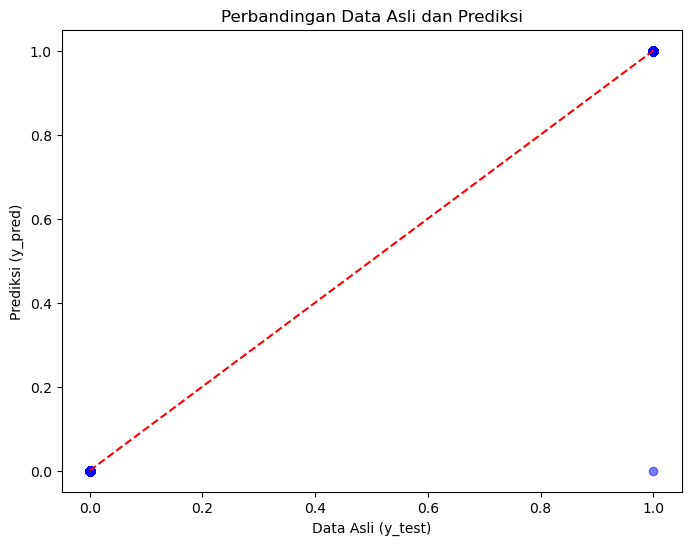

In [28]:
import matplotlib.pyplot as plt

# Scatter plot untuk membandingkan y_test vs y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')

# Menambahkan garis diagonal sebagai referensi
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Menambahkan label dan title
plt.xlabel('Data Asli (y_test)')
plt.ylabel('Prediksi (y_pred)')
plt.title('Perbandingan Data Asli dan Prediksi')

# Menampilkan plot
plt.show()


In [30]:
# Membuat DataFrame untuk melihat hasil asli dan prediksi
import pandas as pd

# Menambahkan hasil prediksi ke dalam DataFrame
results_df = pd.DataFrame({'Data Asli': y_test, 'Prediksi': y_pred})

# Menampilkan beberapa baris pertama dari DataFrame
print(results_df.head())


   Data Asli  Prediksi
0          0         0
1          0         0
2          0         0
3          0         0
4          0         0
